# Como Colocar um Modelo de Machine Learning em Produção com Flask
## Começa 20:05

## Quer aprender a habilidade mais importante para trabalhar com Data Science? Acesse CursoDeDataScience.com

# DESAFIO: Mestres do Scikit-learn!

In [2]:
import flask

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
p = pd.read_csv("clickbait_titles.csv", index_col=0, parse_dates=['timestamp'])
n = pd.read_csv("non_clickbait_titles.csv", index_col=0,parse_dates=['timestamp'])
p['y'] = 1
n['y'] = 0

data = pd.concat([p,n], axis=0, ignore_index=True).sort_values("timestamp")

In [5]:
data.head()

,timestamp,title,url,y
801,2013-08-29 14:48:00,24 Coisas Que As Pessoas Solteiras Estão Cansa...,https://www.buzzfeed.com/ashleyperez/24-coisas...,1
800,2013-08-30 15:10:58,27 Decisões Do Dia-a-dia Que Pessoas De Vinte-...,https://www.buzzfeed.com/regajha/27-decisoes-d...,1
799,2013-09-04 12:07:03,21 Fotos Provando Que Os Irmãos Mais Velhos Tê...,https://www.buzzfeed.com/moerder/21-fotos-prov...,1
798,2013-09-04 16:06:57,30 Sinais De Que Você Tem Quase 30,https://www.buzzfeed.com/jessicamisener/30-sin...,1
1306,2013-10-18 03:29:53,38 Sinais Que Você é Um Basset Hound,https://www.buzzfeed.com/chelseamarshall/38-si...,1


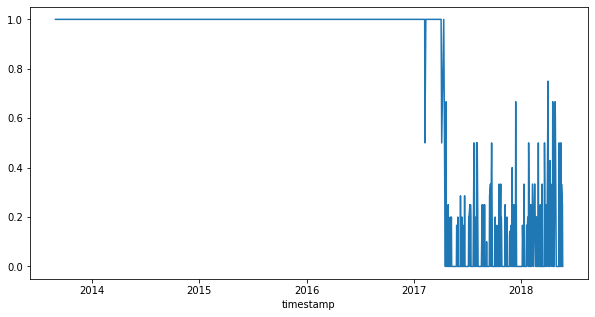

In [6]:
data.groupby(data['timestamp'].dt.date)['y'].mean().plot(figsize=(10,5))

In [7]:
data = data[data['timestamp'] >= "2017-06-01"]

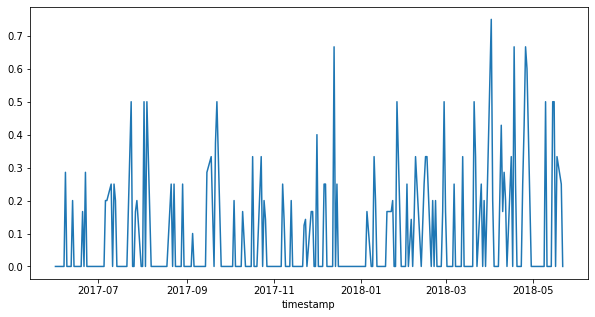

In [8]:
data.groupby(data['timestamp'].dt.date)['y'].mean().plot(figsize=(10,5))

In [9]:
data.head()

,timestamp,title,url,y
2222,2017-06-01 14:13:41,"Peça-chave na Lava Jato, Funaro negocia delaçã...",https://www.buzzfeed.com/filipecoutinho/peca-c...,0
2221,2017-06-01 14:38:39,"Após palestra-culto, o pastor-procurador de MS...",https://www.buzzfeed.com/tatianafarah/o-procur...,0
2220,2017-06-01 15:02:00,Polícia Federal vai chamar Haddad para depor s...,https://www.buzzfeed.com/alexandrearagao/opera...,0
2219,2017-06-01 19:16:59,Defesa de Dilma diz que chapa é única e que Te...,https://www.buzzfeed.com/tatianafarah/defesa-d...,0
2218,2017-06-01 22:04:20,Esses dois amigos do Rio tiraram uma selfie du...,https://www.buzzfeed.com/alexandrearagao/tirot...,0


In [10]:
data['title_proc'] = data['title'].str.lower().str.replace(r'[^\w\s]+', ' ')
data['title_proc'].head()

2222    peça chave na lava jato  funaro negocia delaçã...
2221    após palestra culto  o pastor procurador de ms...
2220    polícia federal vai chamar haddad para depor s...
2219    defesa de dilma diz que chapa é única e que te...
2218    esses dois amigos do rio tiraram uma selfie du...
Name: title_proc, dtype: object

In [11]:
data.shape

(1031, 5)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [13]:
Xtrain, ytrain = data['title_proc'].iloc[:data.shape[0] // 2], data['y'].iloc[:data.shape[0] // 2]
Xtest, ytest = data['title_proc'].iloc[data.shape[0] // 2:], data['y'].iloc[data.shape[0] // 2:]

In [14]:
ytrain.mean()

0.07766990291262135

In [15]:
base = np.ones(Xtest.shape[0]) * ytrain.mean()
log_loss(ytest, base)

0.44050839748966253

In [18]:
#novo remédio para combater a calvice
#novo, remédio, para, combater, a, calvice,  novo remedio, remedio para, para combater, combater a, a calvice 

In [19]:
mdl = make_pipeline(TfidfVectorizer(min_df=1, ngram_range=(1,1)), 
                    RandomForestClassifier(n_estimators=1000, n_jobs=6, random_state=0))
mdl.fit(Xtrain, ytrain)
p = mdl.predict_proba(Xtest)[:,1]
log_loss(ytest, p)

0.24958750065851476

In [20]:
len(mdl.named_steps.tfidfvectorizer.vocabulary_)

2200

In [21]:
mdl = make_pipeline(TfidfVectorizer(min_df=2, ngram_range=(1,1)), LogisticRegression(C=20.))
mdl.fit(Xtrain, ytrain)
p = mdl.predict_proba(Xtest)[:,1]
log_loss(ytest, p)

0.23797054770590273

In [22]:
mdl = make_pipeline(TfidfVectorizer(min_df=2, ngram_range=(1,1)), LogisticRegression(C=20.))
mdl.fit(data['title_proc'], data['y'])

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=2, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=20.0, class_weight=None, dual=False,
                                    fit_interce

In [82]:
import joblib as jb
jb.dump(mdl, "mdl.pkl.z")

['mdl.pkl.z']

# API Requests

In [134]:
import requests as r
import urllib.parse

In [164]:
#encoded = urllib.parse.quote("10 coisas fofas e baratinhas para alegrar a vida")
#encoded = urllib.parse.quote("Você não vai acreditar no segredo devastador que o filho de Leonardo, Zé Felipe, possui em sua vida")
#encoded = urllib.parse.quote("Homem é preso por descobrir segredo que ensina a falar inglês fluente em uma hora")
#encoded = urllib.parse.quote("pare de fumar em 5 dias")
#encoded = urllib.parse.quote("Aprenda machine learning em apenas 10 dias sem precisar estudar nada")
encoded =  urllib.parse.quote("Banco central anuncia queda na taxa de juros")

Google Optimize, Multi Armed Bandits

In [166]:
encoded

'Banco%20central%20anuncia%20queda%20na%20taxa%20de%20juros'

In [167]:
res = r.get("http://localhost:8000/?titulo={}".format(encoded))
res.text

'{"titulo": "Banco central anuncia queda na taxa de juros", "p": 0.007999256122400645}'

In [ ]:
@mariofilhoml

In [168]:
import json
json.loads(res.text)

{'titulo': 'Banco central anuncia queda na taxa de juros',
 'p': 0.007999256122400645}